<a href="https://colab.research.google.com/github/srishanthdevoju/eda_tekworks/blob/main/datacleaning_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic dataset
df = sns.load_dataset('titanic')
df.head()
print("-"*90)
print(df.info)
print("-"*90)
print(df.describe)
print("-"*90)
print(df.isnull().sum())
print("-"*90)

------------------------------------------------------------------------------------------
<bound method DataFrame.info of      survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890     

In [ ]:
missing = pd.DataFrame({
    'missing_count': df.isnull().sum(),
    'missing_percent': (df.isnull().sum() / len(df)) * 100
})
missing = missing.sort_values(by='missing_percent', ascending=False)
print(missing)

             missing_count  missing_percent
deck                   688        77.216611
age                    177        19.865320
embarked                 2         0.224467
embark_town              2         0.224467
sex                      0         0.000000
pclass                   0         0.000000
survived                 0         0.000000
fare                     0         0.000000
parch                    0         0.000000
sibsp                    0         0.000000
class                    0         0.000000
adult_male               0         0.000000
who                      0         0.000000
alive                    0         0.000000
alone                    0         0.000000


In [ ]:
# 4. Handling Missing Values

# Fill the numeric missing values with the mean
df['age'] = df['age'].fillna(df['age'].mean())

# Fill categorical missing values with mode
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

# Drop 'deck' column (too many missing values), only if it exists
if 'deck' in df.columns:
    df.drop(columns=['deck'], inplace=True)

print("Missing values after cleaning: \n", df.isnull().sum().sum())

Missing values after cleaning: 
 2


In [ ]:
missing = pd.DataFrame({
    'missing_count': df.isnull().sum(),
    'missing_percent': (df.isnull().sum() / len(df)) * 100
})
missing = missing.sort_values(by='missing_percent', ascending=False)
print(missing)

             missing_count  missing_percent
embark_town              2         0.224467
survived                 0         0.000000
sex                      0         0.000000
age                      0         0.000000
sibsp                    0         0.000000
pclass                   0         0.000000
parch                    0         0.000000
fare                     0         0.000000
class                    0         0.000000
embarked                 0         0.000000
who                      0         0.000000
adult_male               0         0.000000
alive                    0         0.000000
alone                    0         0.000000


In [ ]:
print("Duplicate rows:", df.duplicated().sum())

# Convert some columns to category type
df['class'] = df['class'].astype('category')
df['sex'] = df['sex'].astype('category')
df['embarked'] = df['embarked'].astype('category')

df.info()

Duplicate rows: 111
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    category
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    category
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(3), float64(2), int64(4), object(3)
memory usage: 67.5+ KB


Descriptive statistics for numerical columns:
         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   13.002015    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   22.000000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   29.699118    0.000000    0.000000   14.454200
75%      1.000000    3.000000   35.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


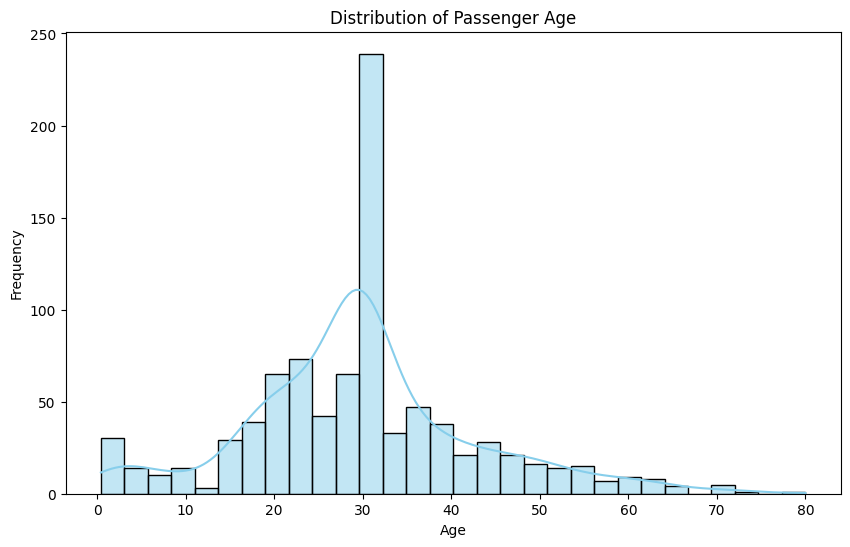

----------------------------------------------------------------------------------------------------


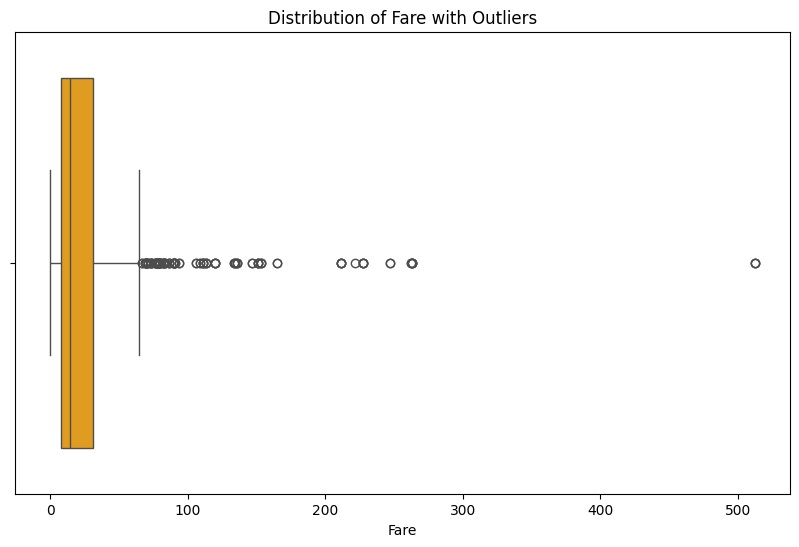

In [ ]:
# 6. Univariate analysis - Numerical Features
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
print("Descriptive statistics for numerical columns:")
print(df[num_cols].describe())

# Histograms: Age
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Passenger Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
print("----------"*10)

# Boxplot: Fare
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['fare'], color='orange')
plt.title('Distribution of Fare with Outliers')
plt.xlabel('Fare')
plt.show()

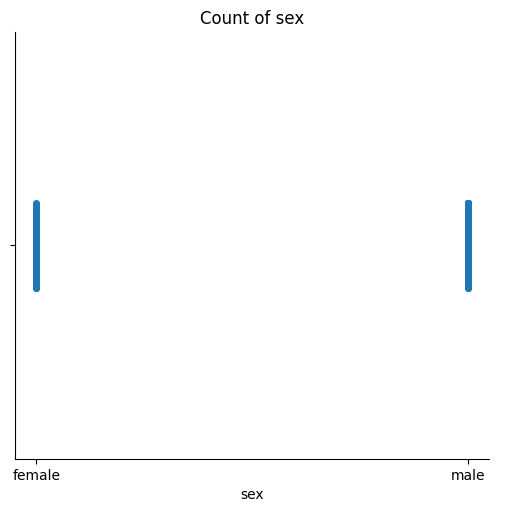

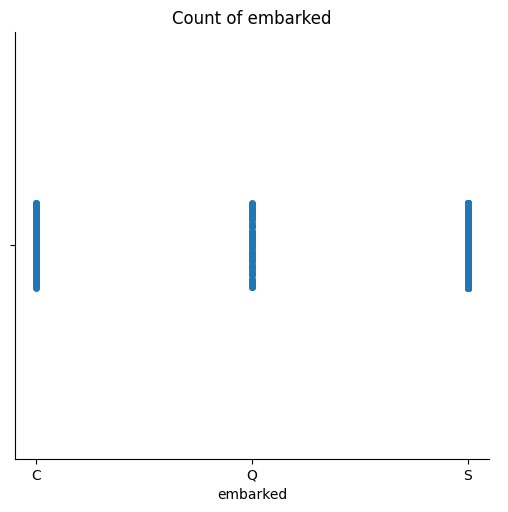

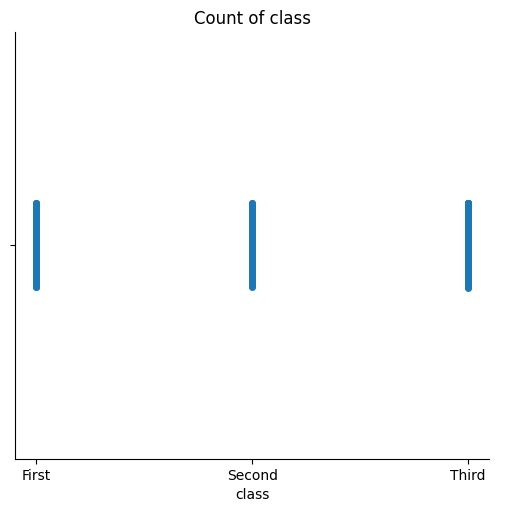

In [ ]:
# Univariate Analysis - Categorical Features

cat_clos = df.select_dtypes('category').columns

for col in cat_clos:
    sns.catplot(x=col, data=df)
    plt.title(f"Count of {col}")
    plt.show()

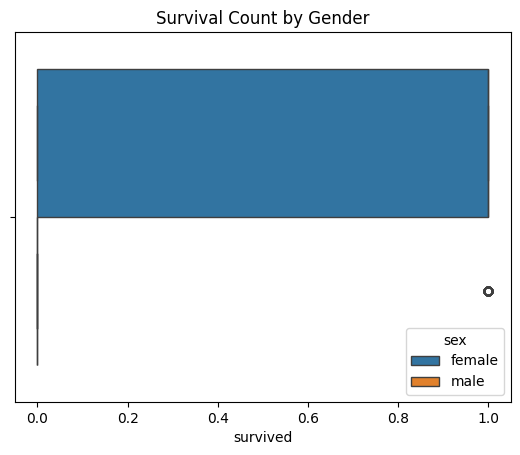

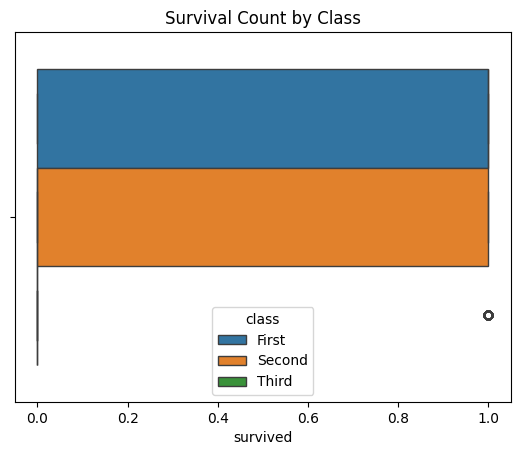

In [ ]:
  # Bivariate Analysis - Categorical vs Categorical

sns.boxplot(x='survived', hue='sex', data=df)
plt.title("Survival Count by Gender")
plt.show()

sns.boxplot(x='survived', hue='class', data=df)
plt.title("Survival Count by Class")
plt.show()

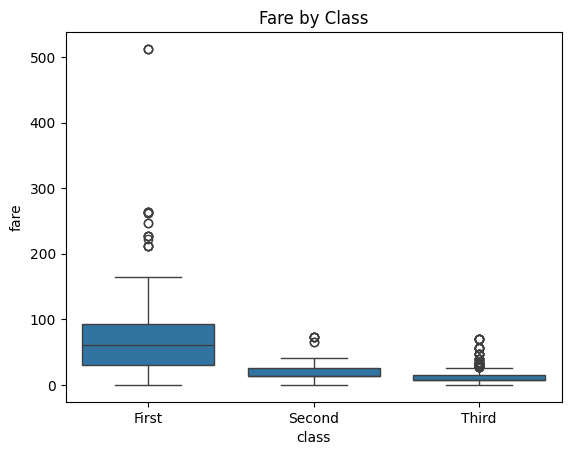

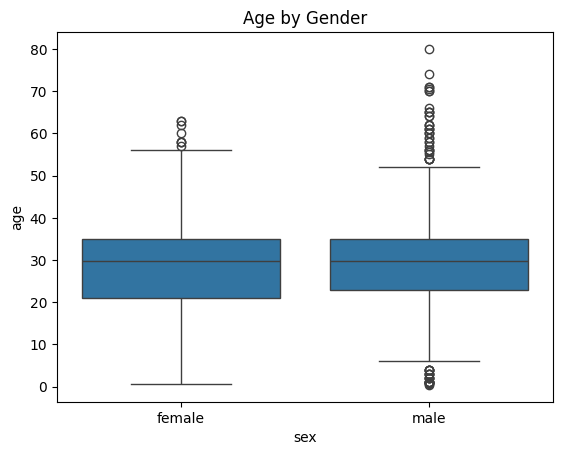

In [ ]:
# Bivariate Analysis - Numerical vs Categorical

sns.boxplot(x='class', y='fare', data=df)
plt.title("Fare by Class")
plt.show()

sns.boxplot(x='sex', y='age', data=df)
plt.title("Age by Gender")
plt.show()

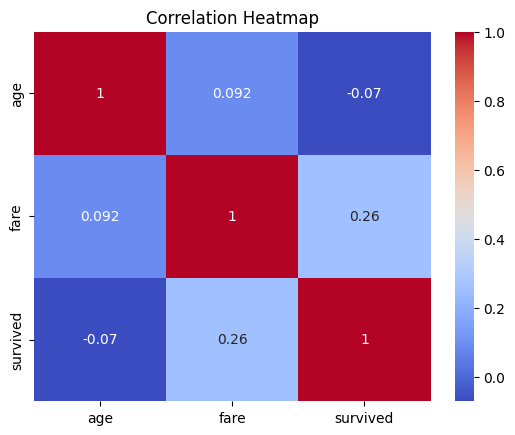

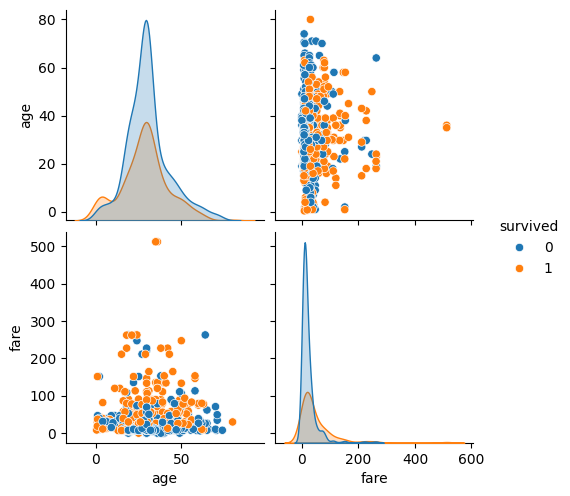

In [ ]:


corr = df[['age', 'fare', 'survived']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

sns.pairplot(df[['age', 'fare', 'survived']], hue='survived')
plt.show()